**1. Import the required libraries and read the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
bank = pd.read_csv('Bank_Personal_Loan_Modelling (1).csv')

**2. Check the first few samples, shape, info of the data and try to familiarize yourself with different
features.**

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank.shape

(5000, 14)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the
columns which you feel are redundant.**


In [8]:
 bank.duplicated().sum()

0

In [9]:
bank[bank.duplicated()] #no duplicates

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [10]:
bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
bank.drop(columns=['ID'],axis=1,inplace=True) #dropping ID column, which is redundant for analysis

In [12]:
bank.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**4. Display the Five Point Summary and write your key findings**

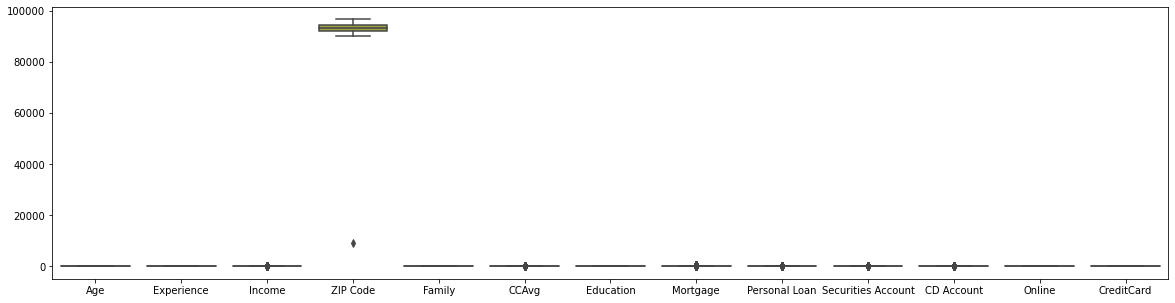

In [13]:
plt.figure(figsize=(20,5)) #boxplot for all the features
sns.boxplot(data=bank)

plt.show()

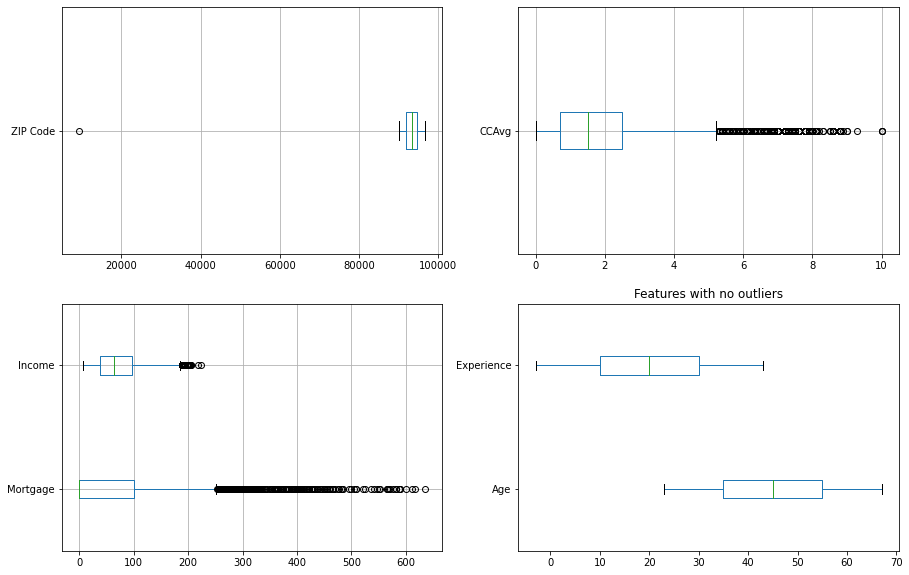

In [14]:
plt.figure(figsize=(15,10))  #box plot for continuous variables 

#first 
plt.subplot(2,2,1)
bank[['ZIP Code']].boxplot(vert=False)


#second
plt.subplot(2,2,2)
bank[['CCAvg']].boxplot(vert=False)


#third
plt.subplot(2,2,3)
bank[['Mortgage','Income']].boxplot(vert=False)

#fourth
plt.subplot(2,2,4)
plt.title('Features with no outliers')
bank[['Age','Experience']].boxplot(vert=False)
plt.grid()
plt.show()
#Features with outliers

In [15]:
bank[['Age','Experience','Mortgage','Income','ZIP Code','CCAvg']].describe().T # continuous variables

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0


1. The min age of custmer is found to be 23 
2. The max age is found to be 67 years old
3. The min years of working experience for the customer is found to be 0 and the max is 43 years
4. No outliers were found for age and Experience
5. The Mortgage ranges from 0 dollars by a customer to 635000 dollars 
6. The third quartile for mortgage is 101000 dollars , but the max is 635000 dollars. Hence it is found to be a right skewed 
   distribution
7. More than 50% of the customers in the bank has no mortgage 
8. The min income of customer is 8000 dollars and the maimum is 224000 dollars
9. The third quartile of income is 98000 dollars , hence the distribution can be skewed to the right 
10. The Avg spending on credit card per month is around 1940 dollaars. The max is 10000 dollars 
11. Since 75 % of customers spend equal to or less than 2500 dollars on credit card , it is evident that the distribution is 
    highly skewed to the right 

**5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint:
.abs function)**


In [16]:
bank['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [17]:
bank['Experience'] = bank['Experience'].abs()  #using abs to convert the values to absolute values 

In [18]:
bank['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

**6. Get the target column distribution and comment on the class distribution.**

In [19]:
# Target column is personal loan
loan = bank['Personal Loan'].value_counts()
loan

0    4520
1     480
Name: Personal Loan, dtype: int64

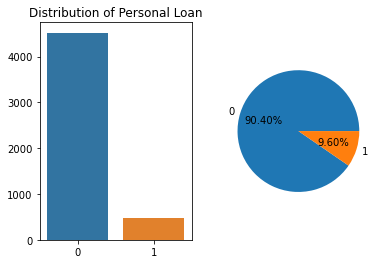

In [20]:
#Distribution
plt.subplot(1,2,1)
sns.barplot(x =loan.index,y=loan.values)
plt.title('Distribution of Personal Loan')
plt.subplot(1,2,2)
plt.pie(loan,autopct='%.2f%%',labels=loan.index)
plt.show()

# More than 90 percent of the customers don't have a loan in this bank
# Less than 10 percent of the customers are asset customers 

**7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X
variable.**

In [21]:
X = bank.drop('Personal Loan',axis=1)
y= bank[['Personal Loan']]

In [22]:
X #independent variables

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [23]:
y #dependent variable

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


**8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the
z-score scaling approach.**


In [24]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)
print('ytrain',ytrain.shape)
print('ytest',ytest.shape)

Xtrain (3500, 12)
Xtest (1500, 12)
ytrain (3500, 1)
ytest (1500, 1)


In [26]:
scaler = StandardScaler()

In [27]:
#scaling the continuous value columns 
columns = [['Age','Experience','Income','ZIP Code','CCAvg','Mortgage']]
for i in columns:
    Xtrain[i] = scaler.fit_transform(Xtrain[i])

In [28]:
for i in columns:
    Xtest[i] = scaler.fit_transform(Xtest[i])

In [29]:
Xtrain = pd.DataFrame(Xtrain,columns=X.columns)
Xtest = pd.DataFrame(Xtest,columns=X.columns)

In [30]:
Xtrain #train data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1840,0.863721,0.448505,-1.106854,-0.022158,4,-0.877185,3,0.295858,0,0,0,0
2115,1.037984,0.973687,-0.953684,0.843385,3,-0.305492,1,-0.554379,0,0,0,0
4437,1.560773,1.586400,-0.231599,-0.286139,2,-0.248322,1,-0.554379,0,0,1,0
1146,-1.227433,-1.127040,-0.056548,-1.376000,1,-1.048693,1,0.199240,1,0,0,0
2486,1.386510,1.411339,1.234454,-0.193592,1,-0.362661,1,1.928699,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,-1.053170,-1.039510,1.453268,1.171269,1,1.523927,1,-0.554379,0,0,1,0
466,-1.750222,-1.739753,-1.325668,-0.799559,2,-0.591338,3,-0.554379,0,0,1,0
3092,-0.181856,-0.164207,0.862470,-1.375119,2,-0.877185,1,2.585700,1,0,0,0
3772,-0.878907,-0.864449,1.715844,0.421190,2,0.609218,1,-0.554379,0,0,1,0


In [31]:
Xtest #test data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1501,-1.396204,-1.472573,-0.838283,-0.586182,2,-0.944255,2,-0.559275,1,0,0,1
2586,0.094280,0.199006,1.598504,-0.271029,4,2.382444,1,-0.559275,0,0,0,1
2653,-1.396204,-1.384595,0.999995,0.816105,2,0.661738,1,3.631747,0,0,1,0
1055,-1.308529,-1.296617,-0.261149,1.437738,1,-0.542757,1,-0.559275,1,0,1,0
705,1.409414,1.342717,-0.945160,0.911519,3,-0.714827,2,-0.559275,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3563,0.620334,0.550917,1.384751,1.072276,1,-0.600114,3,-0.559275,0,0,0,0
1538,0.795685,0.814851,-0.859659,1.547608,4,-1.058969,3,1.053446,0,0,1,0
1837,-0.256422,-0.240883,0.615239,-1.766416,3,-0.542757,1,1.289705,0,0,1,1
2380,-0.519449,-0.416839,-0.517653,-0.310929,2,-0.772184,3,-0.559275,0,0,0,0


**9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying
personal loans. Display the train and test accuracy scores.**

In [32]:
logreg = LogisticRegression()

In [33]:
logreg.fit(Xtrain,ytrain)

LogisticRegression()

In [34]:
logreg.fit(Xtest,ytest)

LogisticRegression()

In [35]:
ypred = logreg.predict(Xtest) #predicting y based on test data

In [36]:
ypred1 = logreg.predict(Xtrain) #predicting y based on train data

In [37]:
metrics.accuracy_score(ypred1,ytrain) #accuracy based on train data

0.95

In [38]:
metrics.accuracy_score(ypred,ytest) #accuracy score based on test data

0.9453333333333334

**10. Print the confusion matrix and classification report for the model and write your conclusions on the
results**

In [39]:
print(classification_report(ypred1,ytrain)) 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3238
           1       0.63      0.78      0.70       262

    accuracy                           0.95      3500
   macro avg       0.81      0.87      0.84      3500
weighted avg       0.96      0.95      0.95      3500



In [40]:
print(classification_report(ypred,ytest)) # report based on test data and predicted data

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1383
           1       0.61      0.82      0.70       117

    accuracy                           0.95      1500
   macro avg       0.80      0.89      0.84      1500
weighted avg       0.96      0.95      0.95      1500



In [41]:
confusionMatrix = metrics.confusion_matrix(ypred,ytest)

In [42]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

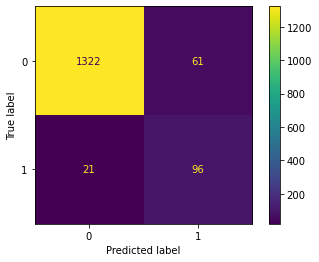

In [43]:
disp.plot() #confusion matrix
plt.show()